# Comparison of Albon and Perez alongside Max Verstappen (Season over Season)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [2]:
number_of_rounds = 17
rounds = list(range(1, number_of_rounds+1))
years = [2020, 2021]
df = pd.DataFrame()

# read all qualifying data and append them into one big DataFrame
for year in years:
    for round_ in rounds:
        data = pd.read_csv(f"data/{year}_round_{round_}_qualifying.csv")
        df = df.append(data, ignore_index=True)

df.drop(columns=['Unnamed: 0'], inplace=True) # Drop useless column
df.sample(5)

season  round                        cirquit  position driver  driver_no  \
7      2020      1                  Red Bull Ring         8    SAI         55   
3      2020      1                  Red Bull Ring         4    NOR          4   
368    2021      2  Autodromo Enzo e Dino Ferrari         9    OCO         31   
127    2020      7   Circuit de Spa-Francorchamps         8    PER         11   
6      2020      1                  Red Bull Ring         7    LEC         16   

        constructor        q1        q2        q3  secs_q1  secs_q2  secs_q3  
7           McLaren  1:04.537  1:03.971  1:03.971   64.537   63.971   63.971  
3           McLaren  1:04.606  1:03.819  1:03.626   64.606   63.819   63.626  
368  Alpine F1 Team  1:15.385  1:15.117  1:15.210   75.385   75.117   75.210  
127    Racing Point  1:43.349  1:42.670  1:42.532  103.349  102.670  102.532  
6           Ferrari  1:04.500  1:04.041  1:03.923   64.500   64.041   63.923

## Best Qualifying Lap of the Driver

In [3]:
# calculate best qualifying performance per round per driver across Q1/Q2/Q3 (if attended)
df['best_qualifying'] = df[['secs_q1', 'secs_q2', 'secs_q3']].min(axis=1)
df.sample(2)

season  round                               cirquit  position driver  \
171    2020      9  Autodromo Internazionale del Mugello        12    KVY   
478    2021      7                   Circuit Paul Ricard        20    TSU   

     driver_no constructor        q1        q2   q3  secs_q1  secs_q2  \
171         26  AlphaTauri  1:16.928  1:16.854  NaN   76.928   76.854   
478         22  AlphaTauri       NaN       NaN  NaN      NaN      NaN   

     secs_q3  best_qualifying  
171      NaN           76.854  
478      NaN              NaN

## 2020 vs. 2021

In [4]:
# get copies of the overall DataFrame for VER/ALB and VER/PER
df_2020 = df.loc[((df.driver == 'VER') | (df.driver == 'ALB')) & (df.season == 2020)].copy()
df_2021 = df.loc[((df.driver == 'VER') | (df.driver == 'PER')) & (df.season == 2021)].copy()

In [43]:
# Q3 Appearences Albon in 2020
df_2020.loc[df_2020.driver == 'VER'].isnull().sum()[df_2020.isnull().sum() > 0]

q3         0
secs_q3    0
dtype: int64

In [42]:
# Q3 Appearences Perez in 2021
df_2021.loc[df_2021.driver == 'VER'].isnull().sum()[df_2021.isnull().sum() > 0]

q1                 1
q2                 1
q3                 1
secs_q1            1
secs_q2            1
secs_q3            1
best_qualifying    1
delta_to_best      1
dtype: int64

In [38]:
print(f"Average Position Albon: {df_2020.loc[df_2020.driver == 'ALB'].position.mean()}")
print(f"Median Position Albon: {df_2020.loc[df_2020.driver == 'ALB'].position.median()}")
print(f"STD Position Albon: {df_2020.loc[df_2020.driver == 'ALB'].position.std()}")

Average Position Albon: 7.176470588235294
Median Position Albon: 6.0
STD Position Albon: 3.046212691967828


In [40]:
print(f"Average Position VER 2020: {df_2020.loc[df_2020.driver == 'VER'].position.mean()}")
print(f"Median Position VER 2020: {df_2020.loc[df_2020.driver == 'VER'].position.median()}")
print(f"STD Position VER 2020: {df_2020.loc[df_2020.driver == 'VER'].position.std()}")

Average Position VER 2020: 3.1176470588235294
Median Position VER 2020: 3.0
STD Position VER 2020: 1.3173056280328643


In [39]:
print(f"Average Position Perez: {df_2021.loc[df_2021.driver == 'PER'].position.mean()}")
print(f"Median Position Perez: {df_2021.loc[df_2021.driver == 'PER'].position.median()}")
print(f"STD Position Perez: {df_2021.loc[df_2021.driver == 'PER'].position.std()}")


Average Position Perez: 6.647058823529412
Median Position Perez: 7.0
STD Position Perez: 3.534493890053218


In [41]:
print(f"Average Position VER 2021: {df_2021.loc[df_2021.driver == 'VER'].position.mean()}")
print(f"Median Position VER 2021: {df_2021.loc[df_2021.driver == 'VER'].position.median()}")
print(f"STD Position VER 2021: {df_2021.loc[df_2021.driver == 'VER'].position.std()}")


Average Position VER 2021: 3.0
Median Position VER 2021: 2.0
STD Position VER 2021: 4.47213595499958


In [44]:
16 / 17

0.9411764705882353

<AxesSubplot:xlabel='driver', ylabel='position'>

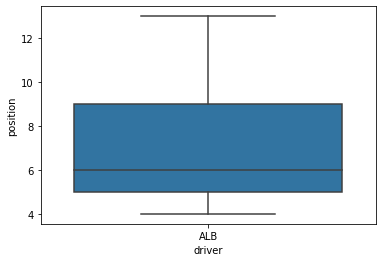

In [34]:
sns.boxplot(x='driver', y='position', data=df_2020.loc[df_2020.driver == 'ALB'])

<AxesSubplot:xlabel='driver', ylabel='position'>

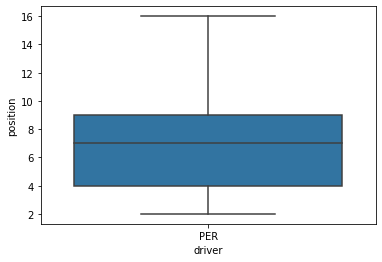

In [35]:
sns.boxplot(x='driver', y='position', data=df_2021.loc[df_2021.driver == 'PER'])

## Compare Driver Function

In [45]:
def compare_driver(df, drivers):
    df['delta_to_best'] = 0.0
    df['delta_to_team_mate'] = 0.0
    rounds = df['round'].unique()

    for driver in drivers:
        for round_ in rounds:
            best_time = df.loc[(df['round'] == round_)]['best_qualifying'].min()
            slow_time = df.loc[(df['round'] == round_)]['best_qualifying'].max()

            driver_data = df.loc[(df['driver'] == driver) & (df['round'] == round_)]

            # write delta to best laptime 
            df.at[driver_data.index, 'delta_to_best'] = driver_data['best_qualifying'] - best_time

            # write delta to team mate
            if driver_data['best_qualifying'].values[0] == best_time:
                df.at[driver_data.index, 'delta_to_team_mate'] = best_time - slow_time
            elif driver_data['best_qualifying'].values[0] == slow_time:
                df.at[driver_data.index, 'delta_to_team_mate'] = slow_time - best_time
            

    return df

In [46]:
df_2020 = compare_driver(df=df_2020, drivers=['VER', 'ALB'])
df_2021 = compare_driver(df=df_2021, drivers=['VER', 'PER'])
df_2021.head()

season  round                             cirquit  position driver  \
340    2021      1       Bahrain International Circuit         1    VER   
350    2021      1       Bahrain International Circuit        11    PER   
361    2021      2       Autodromo Enzo e Dino Ferrari         2    PER   
362    2021      2       Autodromo Enzo e Dino Ferrari         3    VER   
382    2021      3  Autódromo Internacional do Algarve         3    VER   

     driver_no constructor        q1        q2        q3  secs_q1  secs_q2  \
340         33    Red Bull  1:30.499  1:30.318  1:28.997   90.499   90.318   
350         11    Red Bull  1:31.165  1:30.659       NaN   91.165   90.659   
361         11    Red Bull  1:15.395  1:14.716  1:14.446   75.395   74.716   
362         33    Red Bull  1:15.109  1:14.884  1:14.498   75.109   74.884   
382         33    Red Bull  1:19.485  1:18.650  1:18.746   79.485   78.650   

     secs_q3  best_qualifying  delta_to_best  delta_to_team_mate  
340   88.997           88.997          0.000              -1.662  
350      NaN           90.659          1.662               1.662  
361   74.446           74.446          0.000              -0.052  
362   74.498           74.498          0.052               0.052  
382   78.746           78.650          0.000              -0.195

## VER vs. the Team Mates in Qualifying

In [57]:
sns.set_style("darkgrid")

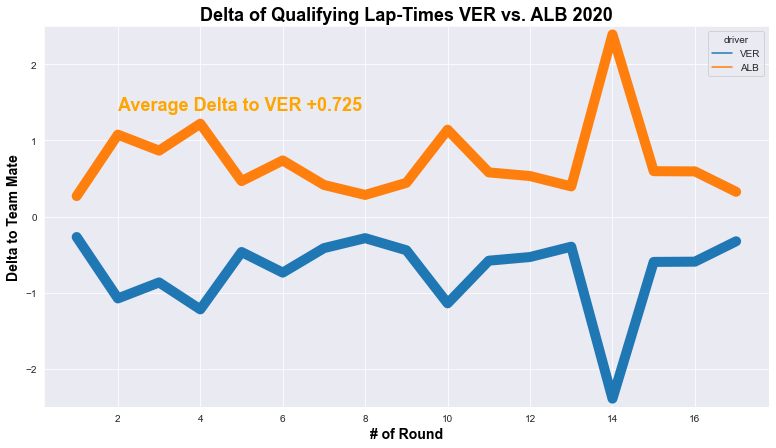

In [82]:
plt.figure(figsize=(13,7))
sns.lineplot(x='round', y='delta_to_team_mate', data=df_2020, hue='driver', linewidth=10)

plt.title("Delta of Qualifying Lap-Times VER vs. ALB 2020", fontdict={'fontsize': 18, 'weight' : 'bold', 'color': 'black'})
plt.text(2, 1.4, f"Average Delta to VER +{round(df_2020.loc[df_2020.driver == 'ALB'].delta_to_team_mate.mean(), 3)}", fontdict={'fontsize': 18, 'weight' : 'bold', 'color': 'orange'})

plt.ylabel("Delta to Team Mate", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})
plt.xlabel("# of Round", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})
plt.ylim(-2.5, 2.5)
# plt.legend().remove()
plt.savefig("output/2020_alb_ver.png")
plt.show()

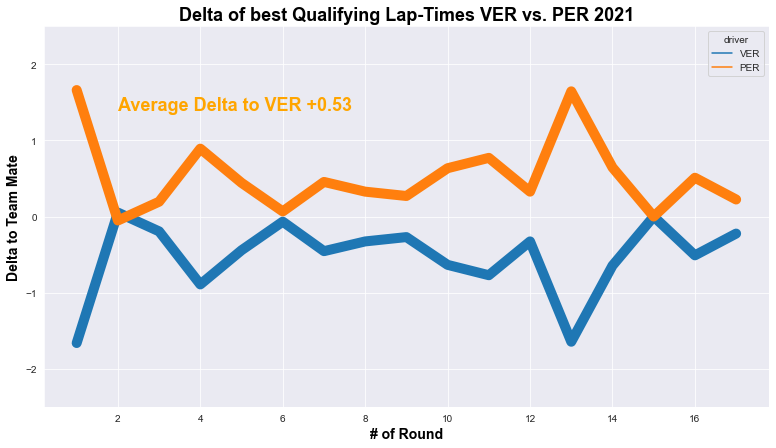

In [85]:
plt.figure(figsize=(13,7))
sns.lineplot(x='round', y='delta_to_team_mate', data=df_2021, hue='driver', linewidth=10)

plt.title("Delta of best Qualifying Lap-Times VER vs. PER 2021", fontdict={'fontsize': 18, 'weight' : 'bold', 'color': 'black'})
plt.text(2, 1.4, f"Average Delta to VER +{round(df_2021.loc[df_2021.driver == 'PER'].delta_to_team_mate.mean(), 3)}", fontdict={'fontsize': 18, 'weight' : 'bold', 'color': 'orange'})

plt.ylabel("Delta to Team Mate", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})
plt.xlabel("# of Round", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})
plt.ylim(-2.5, 2.5)
plt.savefig("output/2021_per_ver.png")
plt.show()

## Perez vs. Albon

In [13]:
alb = df_2020.loc[(df_2020['driver'] == 'ALB')]
per = df_2021.loc[(df_2021['driver'] == 'PER')]

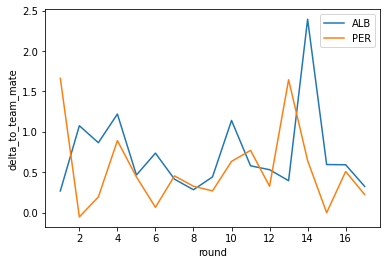

In [14]:
sns.lineplot(x='round', y='delta_to_team_mate', data=alb, label='ALB')
sns.lineplot(x='round', y='delta_to_team_mate', data=per, label='PER')
plt.legend()
plt.show()

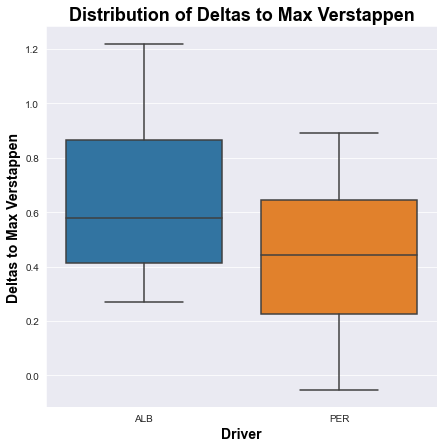

In [90]:
df_both = alb.append(per)

plt.figure(figsize=(7,7))
sns.boxplot(x='driver', y='delta_to_team_mate', data=df_both, showfliers = False)

plt.title("Distribution of Deltas to Max Verstappen", fontdict={'fontsize': 18, 'weight' : 'bold', 'color': 'black'})
plt.ylabel("Deltas to Max Verstappen", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})
plt.xlabel("Driver", fontdict={'fontsize': 14, 'weight' : 'bold', 'color': 'black'})

plt.savefig("output/distribution_deltas.png")
plt.show()

<AxesSubplot:xlabel='delta_to_team_mate', ylabel='Density'>

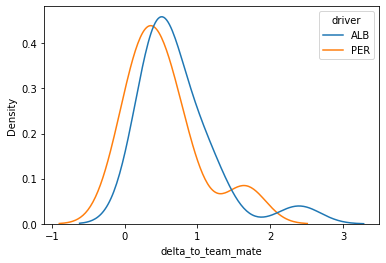

In [17]:
sns.kdeplot(data=df_both, x="delta_to_team_mate", hue="driver")

In [18]:
print(f"PER average delta to Verstappen in 2021: {per.delta_to_team_mate.mean()}")
print(f"ALB average delta to Verstappen in 2020: {alb.delta_to_team_mate.mean()}")

print(f"PER median delta to Verstappen in 2021: {per.delta_to_team_mate.median()}")
print(f"ALB median delta to Verstappen in 2020: {alb.delta_to_team_mate.median()}")

PER average delta to Verstappen in 2021: 0.5303529411764709
ALB average delta to Verstappen in 2020: 0.7254117647058794
PER median delta to Verstappen in 2021: 0.44300000000001205
ALB median delta to Verstappen in 2020: 0.5799999999999983


In [93]:
from scipy.stats import ttest_ind
ttest_ind(per['delta_to_team_mate'].values, alb['delta_to_team_mate'].values)

Ttest_indResult(statistic=-1.1172593063380425, pvalue=0.2722020179556993)

In [92]:
per['delta_to_team_mate']

350    1.662
361   -0.052
383    0.195
407    0.892
428    0.443
445    0.067
462    0.455
483    0.327
501    0.270
523    0.635
542    0.771
565    0.327
594    1.645
607    0.645
627    0.000
645    0.510
661    0.224
Name: delta_to_team_mate, dtype: float64